# Hoofdstuk 15 Vector-valued functions

In [1]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib
import numpy as np
import random
matplotlib.rcParams["font.family"] = "monospace"
matplotlib.rcParams['font.style'] = "italic"
plt.rcParams.update({'mathtext.default':  'regular' })

In [2]:
def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape); 
    y = b2[:,1].reshape(r.shape); 
    z = b2[:,2].reshape(r.shape); 
    ax.plot_surface(x,y,z, **kw)

## Vector-valued functions

### fig_vector_fun_1a

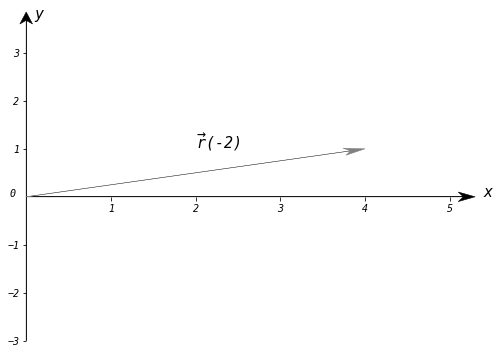

In [3]:
fig1a = plt.figure(figsize=(6,4))
ax1a = fig1a.add_axes([0,0,1,1])
ax1a.set_xlim(-0.1, 5)
ax1a.set_ylim(-3, 3)
ax1a.set_yticks([-3, -2, -1, 1, 2, 3])
ax1a.set_xticks([1, 2, 3, 4, 5])
ax1a.text(-0.2, 0, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax1a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax1a.spines[direction].set_position('zero')

ax1a.arrow(0, 0, 5.1, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax1a.arrow(0, -3, 0, 6.6, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

ax1a.arrow(0, 0, 4, 1, fc='grey', ec='grey', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= True, clip_on = False)

ax1a.text(2, 1, '$\\overrightarrow{r}$(-2)', color="black", size=15)

ax1a.text(5.4, 0, 'x', color="black", size=15)
ax1a.text(0.1, 3.7, 'y', color="black", size=15)
fig1a.savefig("fig_vector_fun_1a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_1b

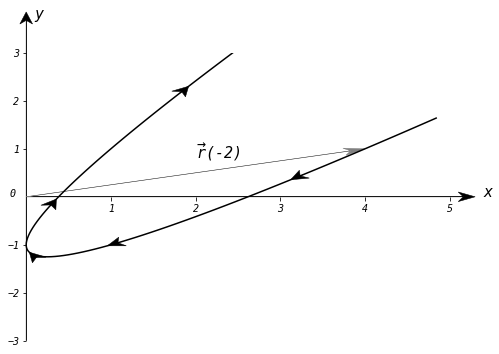

In [4]:
fig1b = plt.figure(figsize=(6,4))
ax1b = fig1b.add_axes([0,0,1,1])
ax1b.set_xlim(-0.1, 5)
ax1b.set_ylim(-3, 3)
ax1b.set_yticks([-3, -2, -1, 1, 2, 3])
ax1b.set_xticks([1, 2, 3, 4, 5])
ax1b.text(-0.2, 0, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax1b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax1b.spines[direction].set_position('zero')

ax1b.arrow(0, 0, 5.1, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax1b.arrow(0, -3, 0, 6.6, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-2.2, 1.7, 100)
ax1b.plot(t**2, t**2+t-1, color='black')

for i in range(10, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2, t1**2+t1-1
    ax1b.arrow(x, y, (t2**2)-x, (t2**2+t2-1)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)

ax1b.arrow(0, 0, 4, 1, fc='grey', ec='grey', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= True, clip_on = False)

ax1b.text(2, 0.8, '$\\overrightarrow{r}$(-2)', color="black", size=15)

ax1b.text(5.4, 0, 'x', color="black", size=15)
ax1b.text(0.1, 3.7, 'y', color="black", size=15)
fig1b.savefig("fig_vector_fun_1b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_2

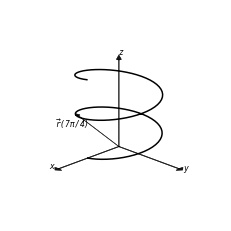

In [5]:
# figure set-up
fig2 = plt.figure(figsize=(4,4))
ax2 = plt.axes(projection='3d')
ax2.axis('off')
ax2.margins(0,0,0)

t = np.linspace(0, 4*np.pi, 100)
ax2.plot3D(np.cos(t), np.sin(t), t, 'black')

arrow3d(ax2, length=5.587992793, width=0.01, head=0.05, headwidth=6, theta_x=10.30890525, theta_z=45, color='black')

ax2.text(1, -1.1, 3, "$\\overrightarrow{r}$(7\u03C0/4)", style='italic', color='black', size=8)

# Axis
arrow3d(ax2, length=2, width=0.02, head=0.05, headwidth=6, theta_x=90, theta_z=90, color='black')
arrow3d(ax2, length=2, width=0.02, head=0.05, headwidth=6, theta_x=-90, color='black')
arrow3d(ax2, length=15, width=0.01, head=0.05, headwidth=6, color='black')

ax2.text(2, -0.2, 0, "x", style='italic', color='black', size=8)
ax2.text(0, 2, 0, "y", style='italic', color='black', size=8)
ax2.text(0, 0, 15, "z", style='italic', color='black', size=8)

ax2.view_init(20, 45)
fig2.savefig("fig_vector_fun_2.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_vector_fun_3a

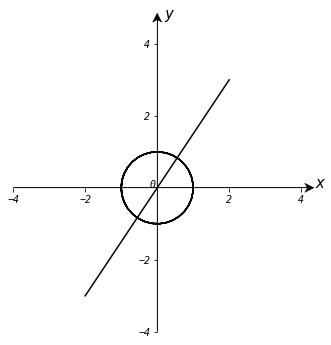

In [6]:
fig3a = plt.figure(figsize=(4,4))
ax3a = fig3a.add_axes([0,0,1,1])
ax3a.set_xlim(-4, 4)
ax3a.set_ylim(-4, 4)
ax3a.set_yticks([-4, -2, 2, 4])
ax3a.set_xticks([-4, -2, 2, 4])
ax3a.text(-0.2, 0, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax3a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax3a.spines[direction].set_position('zero')

ax3a.arrow(-4, 0, 8.1, 0., fc='k', ec='k', lw = .5, head_width=0.25, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)
ax3a.arrow(0, -4, 0, 8.6, fc='k', ec='k', lw = .5, head_width=0.25, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-10, 10, 100)
ax3a.plot(0.2*t, 0.3*t, color='black')
ax3a.plot(np.cos(t), np.sin(t), color='black')

ax3a.text(4.4, 0, 'x', color="black", size=15)
ax3a.text(0.2, 4.7, 'y', color="black", size=15)
fig3a.savefig("fig_vector_fun_3a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_3b

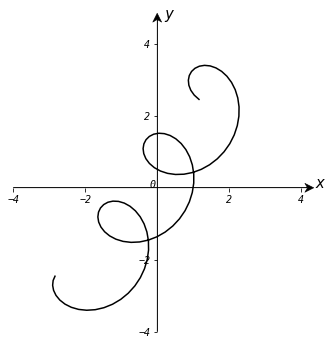

In [7]:
fig3b = plt.figure(figsize=(4,4))
ax3b = fig3b.add_axes([0,0,1,1])
ax3b.set_xlim(-4, 4)
ax3b.set_ylim(-4, 4)
ax3b.set_yticks([-4, -2, 2, 4])
ax3b.set_xticks([-4, -2, 2, 4])
ax3b.text(-0.2, 0, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax3b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax3b.spines[direction].set_position('zero')

ax3b.arrow(-4, 0, 8.1, 0., fc='k', ec='k', lw = .5, head_width=0.25, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)
ax3b.arrow(0, -4, 0, 8.6, fc='k', ec='k', lw = .5, head_width=0.25, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-10, 10, 100)
ax3b.plot(0.2*t + np.cos(t), 0.3*t + np.sin(t), color='black')

ax3b.text(4.4, 0, 'x', color="black", size=15)
ax3b.text(0.2, 4.7, 'y', color="black", size=15)
fig3b.savefig("fig_vector_fun_3b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_3c

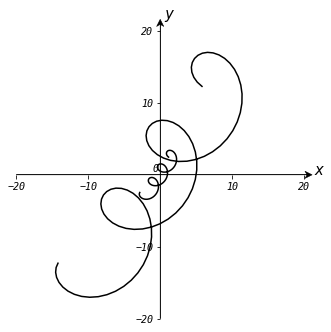

In [8]:
fig3c = plt.figure(figsize=(4,4))
ax3c = fig3c.add_axes([0,0,1,1])
ax3c.set_xlim(-20, 20)
ax3c.set_ylim(-20, 20)
ax3c.set_yticks([-20, -10, 10, 20])
ax3c.set_xticks([-20, -10, 10, 20])
ax3c.text(-1, 0.5, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax3c.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax3c.spines[direction].set_position('zero')

ax3c.arrow(-20, 0, 40.1, 0., fc='k', ec='k', lw = .5, head_width=1, head_length=1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax3c.arrow(0, -20, 0, 40.6, fc='k', ec='k', lw = .5, head_width=1, head_length=1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-10, 10, 100)
ax3c.plot(5*(0.2*t + np.cos(t)), 5*(0.3*t + np.sin(t)), color='black')
ax3c.plot(0.2*t + np.cos(t), 0.3*t + np.sin(t), color='black')

ax3c.text(21.5, 0, 'x', color="black", size=15)
ax3c.text(0.5, 21.7, 'y', color="black", size=15)
fig3c.savefig("fig_vector_fun_3c.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_4

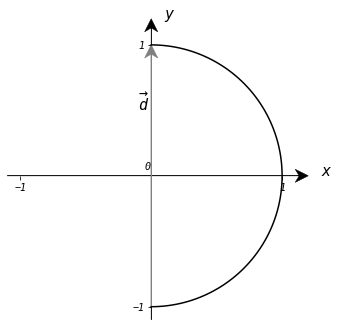

In [9]:
fig4 = plt.figure(figsize=(4,4))
ax4 = fig4.add_axes([0,0,1,1])
ax4.set_xlim(-1.1, 1.1)
ax4.set_ylim(-1.1, 1.1)
ax4.set_yticks([-1, 1])
ax4.set_xticks([-1, 1])
ax4.text(-0.05, 0.05, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax4.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax4.spines[direction].set_position('zero')

ax4.arrow(-1.1, 0, 2.2, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax4.arrow(0, -1.1, 0, 2.2, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-1, 1, 100)
ax4.plot(np.cos(np.pi*t/2), np.sin(np.pi*t/2), color='black')

ax4.arrow(0, -1, 0, 2, fc='grey', ec='grey', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax4.text(-0.1, 0.5, '$\\overrightarrow{d}$', color="black", size=15)

ax4.text(1.3, 0, 'x', color="black", size=15)
ax4.text(0.1, 1.2, 'y', color="black", size=15)
fig4.savefig("fig_vector_fun_4.pdf",bbox_inches='tight')
plt.show()

## Calculus and vector-valued functions

### fig_vector_fun_5a

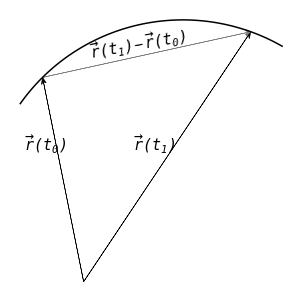

In [10]:
fig5a = plt.figure(figsize=(4,4))
ax5a = fig5a.add_axes([0,0,1,1])
ax5a.set_yticks([])
ax5a.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax5a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax5a.spines[direction].set_position('zero')

t = np.linspace(60/180*np.pi, 145/180*np.pi, 100)
ax5a.plot(4*np.cos(t)+2, 3*np.sin(t)+1, color='black')

ax5a.arrow(0, 0, 4*np.cos(135/180*np.pi)+2, 3*np.sin(135/180*np.pi)+1, fc='k', ec='k', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax5a.arrow(0, 0, 4*np.cos(70/180*np.pi)+2, 3*np.sin(70/180*np.pi)+1, fc='k', ec='k', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax5a.arrow(4*np.cos(135/180*np.pi)+2, 3*np.sin(135/180*np.pi)+1, 4*np.cos(70/180*np.pi)-4*np.cos(135/180*np.pi), 3*np.sin(70/180*np.pi)-3*np.sin(135/180*np.pi), fc='grey', ec='grey', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax5a.text(-1.2, 2, '$\\overrightarrow{r}(t_0)$', color="black", size=15)
ax5a.text(1, 2, '$\\overrightarrow{r}(t_1)$', color="black", size=15)
ax5a.text(0.1, 3.4, '$\\overrightarrow{r}(t_1)-\\overrightarrow{r}(t_0)$', color="black", size=15, rotation=10)


fig5a.savefig("fig_vector_fun_5a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_5b

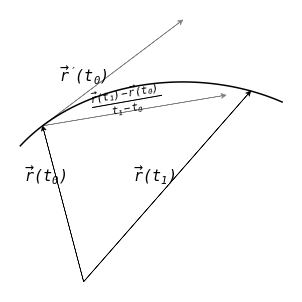

In [11]:
fig5b = plt.figure(figsize=(4,4))
ax5b = fig5b.add_axes([0,0,1,1])
ax5b.set_yticks([])
ax5b.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax5b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax5b.spines[direction].set_position('zero')

t = np.linspace(60/180*np.pi, 145/180*np.pi, 100)
ax5b.plot(4*np.cos(t)+2, 3*np.sin(t)+1, color='black')

ax5b.arrow(0, 0, 4*np.cos(135/180*np.pi)+2, 3*np.sin(135/180*np.pi)+1, fc='k', ec='k', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax5b.arrow(0, 0, 4*np.cos(70/180*np.pi)+2, 3*np.sin(70/180*np.pi)+1, fc='k', ec='k', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax5b.arrow(4*np.cos(135/180*np.pi)+2, 3*np.sin(135/180*np.pi)+1, 4*np.sin(135/180*np.pi), -3*np.cos(135/180*np.pi), fc='grey', ec='grey', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)
ax5b.arrow(4*np.cos(135/180*np.pi)+2, 3*np.sin(135/180*np.pi)+1, -(4*np.cos(70/180*np.pi)-4*np.cos(135/180*np.pi))/(70/180*np.pi-135/180*np.pi), -(3*np.sin(70/180*np.pi)-3*np.sin(135/180*np.pi))/(70/180*np.pi-135/180*np.pi), fc='grey', ec='grey', lw = .6, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax5b.text(-0.5, 4, "$\\overrightarrow{r}'(t_0)$", color="black", size=15)
ax5b.text(-1.2, 2, '$\\overrightarrow{r}(t_0)$', color="black", size=15)
ax5b.text(1, 2, '$\\overrightarrow{r}(t_1)$', color="black", size=15)
ax5b.text(0.1, 3.4, '$\\frac{\\overrightarrow{r}(t_1)-\\overrightarrow{r}(t_0)}{t_1-t_0}$', color="black", size=15, rotation=10)


fig5b.savefig("fig_vector_fun_5b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_6a

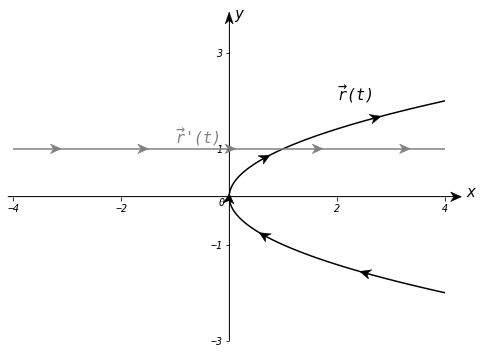

In [12]:
fig6a = plt.figure(figsize=(6,4))
ax6a = fig6a.add_axes([0,0,1,1])
ax6a.set_xlim(-4, 4)
ax6a.set_ylim(-3, 3)
ax6a.set_yticks([-3, -1, 1, 3])
ax6a.set_xticks([-4, -2, 2, 4])
ax6a.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax6a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax6a.spines[direction].set_position('zero')

ax6a.arrow(-4.1, 0, 8.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax6a.arrow(0, -3, 0, 6.6, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-2, 2, 100)
ax6a.plot(t**2, t, color='black')
ax6a.plot(t*2, [1 for _ in range(100)], color='grey')
for i in range(10, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2, t1
    ax6a.arrow(x, y, (t2**2)-x, (t2)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    x, y = t1*2, 1
    ax6a.arrow(x, y, (t2*2)-x, 1-y, fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)


ax6a.text(2, 2, '$\\overrightarrow{r}$(t)', color="black", size=15)
ax6a.text(-1, 1.1, "$\\overrightarrow{r}$'(t)", color="grey", size=15)

ax6a.text(4.4, 0, 'x', color="black", size=15)
ax6a.text(0.1, 3.7, 'y', color="black", size=15)
fig6a.savefig("fig_vector_fun_6a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_6b

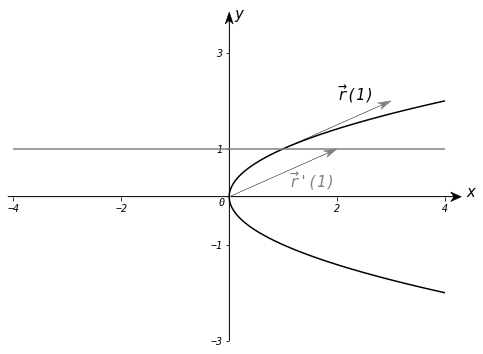

In [13]:
fig6b = plt.figure(figsize=(6,4))
ax6b = fig6b.add_axes([0,0,1,1])
ax6b.set_xlim(-4, 4)
ax6b.set_ylim(-3, 3)
ax6b.set_yticks([-3, -1, 1, 3])
ax6b.set_xticks([-4, -2, 2, 4])
ax6b.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax6b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax6b.spines[direction].set_position('zero')

ax6b.arrow(-4.1, 0, 8.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax6b.arrow(0, -3, 0, 6.6, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-2, 2, 100)
ax6b.plot(t**2, t, color='black')
ax6b.plot(t*2, [1 for _ in range(100)], color='grey')

ax6b.arrow(0, 0, 2, 1, fc='grey', ec='grey', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= True, clip_on = False)
ax6b.arrow(1, 1, 2, 1, fc='grey', ec='grey', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= True, clip_on = False)

ax6b.text(2, 2, '$\\overrightarrow{r}$(1)', color="black", size=15)
ax6b.text(1.1, 0.2, "$\\overrightarrow{r}$'(1)", color="grey", size=15)

ax6b.text(4.4, 0, 'x', color="black", size=15)
ax6b.text(0.1, 3.7, 'y', color="black", size=15)
fig6b.savefig("fig_vector_fun_6b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_7a

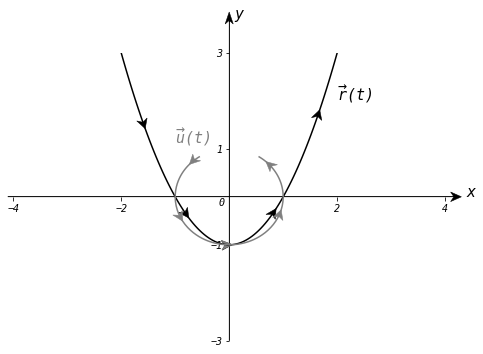

In [14]:
fig7a = plt.figure(figsize=(6,4))
ax7a = fig7a.add_axes([0,0,1,1])
ax7a.set_xlim(-4, 4)
ax7a.set_ylim(-3, 3)
ax7a.set_yticks([-3, -1, 1, 3])
ax7a.set_xticks([-4, -2, 2, 4])
ax7a.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax7a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax7a.spines[direction].set_position('zero')

ax7a.arrow(-4.1, 0, 8.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax7a.arrow(0, -3, 0, 6.6, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-2, 2, 100)
ax7a.plot(t, t**2-1,color='black')
ax7a.plot(t/np.sqrt(t**2 + (t**2 - 1)**2), (t**2 - 1)/np.sqrt(t**2 + (t**2 - 1)**2),color='grey')
for i in range(10, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1, t1**2-1
    ax7a.arrow(x, y, t2-x, (t2**2-1)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    x, y = t1/np.sqrt(t1**2 + (t1**2 - 1)**2), (t1**2 - 1)/np.sqrt(t1**2 + (t1**2 - 1)**2)
    ax7a.arrow(x, y, (t2/np.sqrt(t2**2 + (t2**2 - 1)**2))-x, ((t2**2 - 1)/np.sqrt(t2**2 + (t2**2 - 1)**2))-y, fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    

ax7a.text(2, 2, '$\\overrightarrow{r}$(t)', color="black", size=15)
ax7a.text(-1, 1.1, "$\\overrightarrow{u}$(t)", color="grey", size=15)

ax7a.text(4.4, 0, 'x', color="black", size=15)
ax7a.text(0.1, 3.7, 'y', color="black", size=15)
fig7a.savefig("fig_vector_fun_7a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_7b

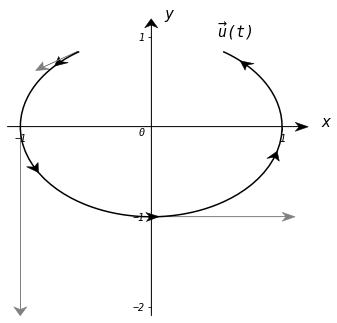

In [15]:
fig7b = plt.figure(figsize=(4,4))
ax7b = fig7b.add_axes([0,0,1,1])
ax7b.set_xlim(-1.1, 1.1)
ax7b.set_ylim(-2.1, 1.1)
ax7b.set_yticks([-2, -1, 1])
ax7b.set_xticks([-1, 1])
ax7b.text(-0.1, -0.1, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax7b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax7b.spines[direction].set_position('zero')

ax7b.arrow(-1.1, 0, 2.2, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax7b.arrow(0, -2.1, 0, 3.2, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-2, 2, 100)
ax7b.plot(t/np.sqrt(t**2 + (t**2 - 1)**2), (t**2 - 1)/np.sqrt(t**2 + (t**2 - 1)**2),color='black')
for i in range(10, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1/np.sqrt(t1**2 + (t1**2 - 1)**2), (t1**2 - 1)/np.sqrt(t1**2 + (t1**2 - 1)**2)
    ax7b.arrow(x, y, (t2/np.sqrt(t2**2 + (t2**2 - 1)**2))-x, ((t2**2 - 1)/np.sqrt(t2**2 + (t2**2 - 1)**2))-y, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax7b.arrow(-1, 0, 0, -2, fc='grey', ec='grey', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax7b.arrow(0, -1, 1, 0, fc='grey', ec='grey', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax7b.arrow(-0.56, 0.84, -0.24, -0.16, fc='grey', ec='grey', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

ax7b.text(0.5, 1, "$\\overrightarrow{u}$(t)", color="black", size=15)

ax7b.text(1.3, 0, 'x', color="black", size=15)
ax7b.text(0.1, 1.2, 'y', color="black", size=15)
fig7b.savefig("fig_vector_fun_7b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_8

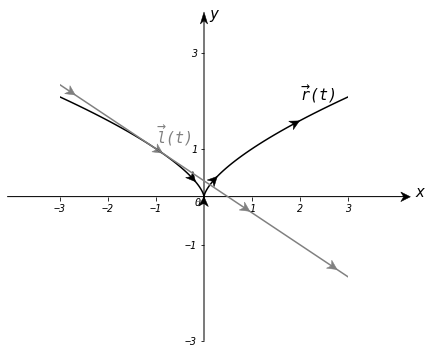

In [16]:
fig8 = plt.figure(figsize=(4,4))
ax8 = fig8.add_axes([0,0,1,1])
ax8.set_xlim(-3, 3)
ax8.set_ylim(-3, 3)
ax8.set_yticks([-3, -1, 1, 3])
ax8.set_xticks([-3, -2, -1, 1, 2, 3])
ax8.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax8.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax8.spines[direction].set_position('zero')

ax8.arrow(-4.1, 0, 8.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax8.arrow(0, -3, 0, 6.6, fc='k', ec='k', lw = .5, head_width=0.15, head_length=0.25, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-1.5, 1.5, 100)
ax8.plot(t**3, t**2,color='black')
ax8.plot(-1+t*3, 1-2*t,color='grey')
for i in range(30, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**3, t1**2
    ax8.arrow(x, y, (t2**3)-x, (t2**2)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    x, y = -1+t1*3, 1-2*t1
    ax8.arrow(x, y, (-1+t2*3)-x, (1-2*t2)-y, fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    

ax8.text(2, 2, '$\\overrightarrow{r}$(t)', color="black", size=15)
ax8.text(-1, 1.1, "$\\overrightarrow{l}$(t)", color="grey", size=15)

ax8.text(4.4, 0, 'x', color="black", size=15)
ax8.text(0.1, 3.7, 'y', color="black", size=15)
fig8.savefig("fig_vector_fun_8.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_9a

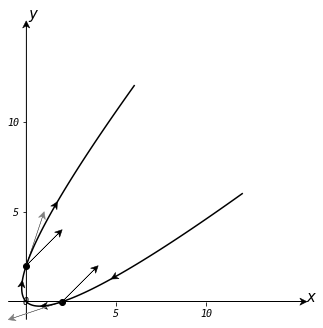

In [17]:
fig9a = plt.figure(figsize=(4,4))
ax9a = fig9a.add_axes([0,0,1,1])
ax9a.set_xlim(-1, 15)
ax9a.set_ylim(-1, 15)
ax9a.set_yticks([5, 10])
ax9a.set_xticks([5, 10])
ax9a.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax9a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax9a.spines[direction].set_position('zero')

ax9a.arrow(-1, 0, 16.2, 0., fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= False, clip_on = False)
ax9a.arrow(0, -1, 0, 16.2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 100)
ax9a.plot(t**2-t, t**2+t,color='black')
ax9a.scatter([2, 0], [0, 2],color='black')
for i in range(20, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1, t1**2+t1
    ax9a.arrow(x, y, (t2**2-t2)-x, (t2**2+t2)-y, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
    
ax9a.arrow(2, 0, -3, -1, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9a.arrow(0, 2, 1, 3, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9a.arrow(2, 0, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9a.arrow(0, 2, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)

ax9a.text(15.6, 0, 'x', color="black", size=15)
ax9a.text(0.1, 15.7, 'y', color="black", size=15)
fig9a.savefig("fig_vector_fun_9a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_9b

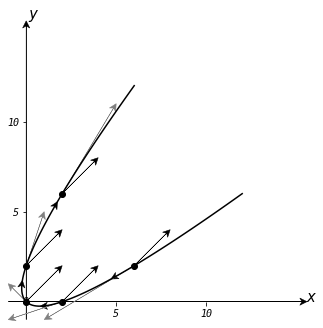

In [18]:
fig9b = plt.figure(figsize=(4,4))
ax9b = fig9b.add_axes([0,0,1,1])
ax9b.set_xlim(-1, 15)
ax9b.set_ylim(-1, 15)
ax9b.set_yticks([5, 10])
ax9b.set_xticks([5, 10])
ax9b.text(-0.2, -0.2, '0', color="black", size=10)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax9b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax9b.spines[direction].set_position('zero')

ax9b.arrow(-1, 0, 16.2, 0., fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= False, clip_on = False)
ax9b.arrow(0, -1, 0, 16.2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 100)
ax9b.plot(t**2-t, t**2+t,color='black')
ax9b.scatter([2, 0, 0, 6, 2], [0, 2, 0, 2, 6],color='black')
for i in range(20, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1, t1**2+t1
    ax9b.arrow(x, y, (t2**2-t2)-x, (t2**2+t2)-y, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
    
ax9b.arrow(2, 0, -3, -1, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(0, 2, 1, 3, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(6, 2, -5, -3, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(0, 0, -1, 1, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(2, 6, 3, 5, fc='grey', ec='grey', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(2, 0, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(0, 2, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(6, 2, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(0, 0, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)
ax9b.arrow(2, 6, 2, 2, fc='k', ec='k', lw = .5, head_width=0.4, head_length=0.4, overhang = 0.3, length_includes_head= True, clip_on = False)

ax9b.text(15.6, 0, 'x', color="black", size=15)
ax9b.text(0.1, 15.7, 'y', color="black", size=15)
fig9b.savefig("fig_vector_fun_9b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_10a

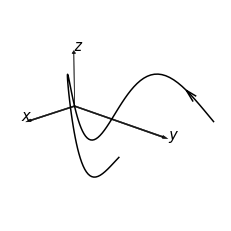

In [19]:
# figure set-up
fig10a = plt.figure(figsize=(4,4))
ax10a = plt.axes(projection='3d')
ax10a.axis('off')
ax10a.margins(0,0,0)

t = np.linspace(-2, 2, 100)
ax10a.plot3D(t, t**2, np.sin(np.pi*t), 'black')

ax10a.quiver(t[5], t[5]**2, np.sin(np.pi*t[5]), -t[5]+t[6], -t[5]**2+t[6]**2, -np.sin(np.pi*t[5])+np.sin(np.pi*t[6]), arrow_length_ratio=2, color='black')

# Axis
arrow3d(ax10a, length=2, width=0.02, head=0.1, headwidth=2, theta_x=90, theta_z=90, color='black')
arrow3d(ax10a, length=4, width=0.02, head=0.05, headwidth=2, theta_x=-90, color='black')
arrow3d(ax10a, length=1.5, width=0.01, head=0.05, headwidth=6, color='black')

ax10a.text(2, -0.2, 0, "x", style='italic', color='black', size=15)
ax10a.text(0, 4, 0, "y", style='italic', color='black', size=15)
ax10a.text(0, 0, 1.5, "z", style='italic', color='black', size=15)

ax10a.view_init(20, 45)
fig10a.savefig("fig_vector_fun_10a.pdf",bbox_inches='tight',dpi=200)
plt.show()

### fig_vector_fun_10b

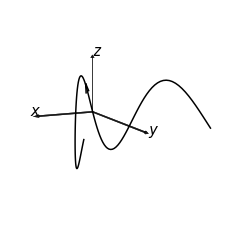

In [20]:
# figure set-up
fig10b = plt.figure(figsize=(4,4))
ax10b = plt.axes(projection='3d')
ax10b.axis('off')
ax10b.margins(0,0,0)

t = np.linspace(-2, 2, 100)
ax10b.plot3D(t, t**2, np.sin(np.pi*t), 'black')

ax10b.quiver(t[55], t[55]**2, np.sin(np.pi*t[55]), -t[55]+t[56], -t[55]**2+t[56]**2, -np.sin(np.pi*t[50])+np.sin(np.pi*t[51]), arrow_length_ratio=2, color='black')

# Axis
arrow3d(ax10b, length=2, width=0.02, head=0.1, headwidth=2, theta_x=90, theta_z=90, color='black')
arrow3d(ax10b, length=4, width=0.02, head=0.05, headwidth=2, theta_x=-90, color='black')
arrow3d(ax10b, length=1.5, width=0.01, head=0.05, headwidth=6, color='black')

ax10b.text(2, -0.2, 0, "x", style='italic', color='black', size=15)
ax10b.text(0, 4, 0, "y", style='italic', color='black', size=15)
ax10b.text(0, 0, 1.5, "z", style='italic', color='black', size=15)

ax10b.view_init(10, 65)
fig10b.savefig("fig_vector_fun_10b.pdf",bbox_inches='tight',dpi=200)
plt.show()

## Unit tangent and normal vectors

### fig_vector_fun_11

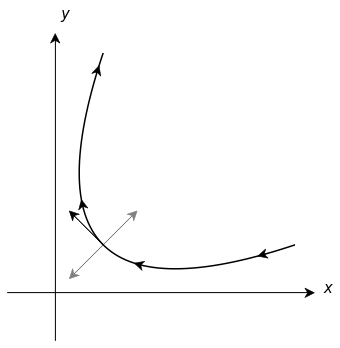

In [21]:
fig11 = plt.figure(figsize=(4,4))
ax11 = fig11.add_axes([0,0,1,1])
ax11.set_xlim(-1, 5)
ax11.set_ylim(-1, 5)
ax11.set_yticks([])
ax11.set_xticks([])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax11.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax11.spines[direction].set_position('zero')

ax11.arrow(-1, 0, 6.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax11.arrow(0, -1, 0, 6.2, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 100)
ax11.plot(0.5*t**2 - t + 1, 0.5*t**2 + t + 1,color='black')
for i in range(20, 100, 20):
    t1 = t[i]
    t2 = t[i+1]
    x, y = 0.5*t1**2 - t1 + 1, 0.5*t1**2 + t1 + 1
    ax11.arrow(x, y, (0.5*t2**2 - t2 + 1)-x, (0.5*t2**2 + t2 + 1)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    
ax11.arrow(1, 1, -0.707106781, 0.707106781, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)

ax11.arrow(1, 1, 0.707106781, 0.707106781, fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
ax11.arrow(1, 1, -0.707106781, -0.707106781, fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)

ax11.text(5.6, 0, 'x', color="black", size=15)
ax11.text(0.1, 5.7, 'y', color="black", size=15)
fig11.savefig("fig_vector_fun_11.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_12

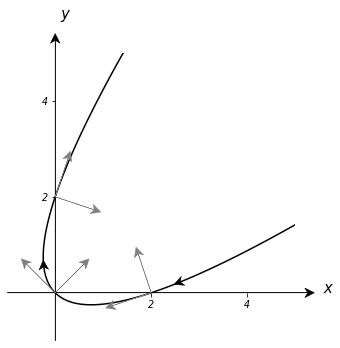

In [22]:
fig12 = plt.figure(figsize=(4,4))
ax12 = fig12.add_axes([0,0,1,1])
ax12.set_xlim(-1, 5)
ax12.set_ylim(-1, 5)
ax12.set_yticks([2, 4])
ax12.set_xticks([2, 4])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax12.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax12.spines[direction].set_position('zero')

ax12.arrow(-1, 0, 6.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax12.arrow(0, -1, 0, 6.2, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-2, 2, 100)
ax12.plot(t**2-t, t**2+t, color='black')
for i in range(20, 100, 40):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1, t1**2+t1
    ax12.arrow(x, y, (t2**2-t2)-x, (t2**2+t2)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)
    
ax12.arrow(0, 0, -1/np.sqrt(2), 1/np.sqrt(2), fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax12.arrow(0, 0, 1/np.sqrt(2), 1/np.sqrt(2), fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax12.arrow(0, 2, 1/np.sqrt(10), 3/np.sqrt(10), fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax12.arrow(0, 2, 3/np.sqrt(10), -1/np.sqrt(10), fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax12.arrow(2, 0, -1/np.sqrt(10), 3/np.sqrt(10), fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)
ax12.arrow(2, 0, -3/np.sqrt(10), -1/np.sqrt(10), fc='grey', ec='grey', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False, zorder=10)

ax12.text(5.6, 0, 'x', color="black", size=15)
ax12.text(0.1, 5.7, 'y', color="black", size=15)
fig12.savefig("fig_vector_fun_12.pdf",bbox_inches='tight')
plt.show()

## Arc length and curvature

### fig_vector_fun_13a

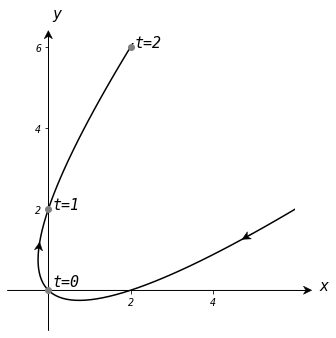

In [23]:
fig13a = plt.figure(figsize=(4,4))
ax13a = fig13a.add_axes([0,0,1,1])
ax13a.set_xlim(-1, 6)
ax13a.set_ylim(-1, 6.1)
ax13a.set_yticks([2, 4, 6])
ax13a.set_xticks([2, 4])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax13a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax13a.spines[direction].set_position('zero')

ax13a.arrow(-1, 0, 7.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax13a.arrow(0, -1, 0, 7.2, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 100)
ax13a.plot(t**2-t, t**2+t, color='black')
ax13a.scatter([0, 0, 2], [0, 2, 6], color='gray', zorder=10)
for i in range(20, 100, 40):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1, t1**2+t1
    ax13a.arrow(x, y, (t2**2-t2)-x, (t2**2+t2)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)

ax13a.text(0.1, 0.1, 't=0', color="black", size=15)
ax13a.text(0.1, 2, 't=1', color="black", size=15)
ax13a.text(2.1, 6, 't=2', color="black", size=15)

ax13a.text(6.6, 0, 'x', color="black", size=15)
ax13a.text(0.1, 6.7, 'y', color="black", size=15)
fig13a.savefig("fig_vector_fun_13a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_13b

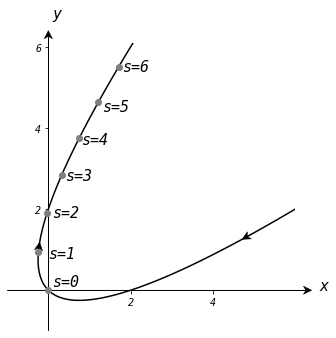

In [24]:
from sympy import Eq, symbols, nsolve, asinh, sqrt

fig13b = plt.figure(figsize=(4,4))
ax13b = fig13b.add_axes([0,0,1,1])
ax13b.set_xlim(-1, 6)
ax13b.set_ylim(-1, 6.1)
ax13b.set_yticks([2, 4, 6])
ax13b.set_xticks([2, 4])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax13b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax13b.spines[direction].set_position('zero')

ax13b.arrow(-1, 0, 7.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)
ax13b.arrow(0, -1, 0, 7.2, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 100)
ax13b.plot(t**2-t, t**2+t, color='black')
for i in range(20, 100, 40):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1, t1**2+t1
    ax13b.arrow(x, y, (t2**2-t2)-x, (t2**2+t2)-y, fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.2, overhang = 0.3, length_includes_head= True, clip_on = False)

t = symbols('t')
for i in range(7):
    value = nsolve((sqrt(2) * asinh(2*t) + 2*t*sqrt(8*t**2+2))/4 - i, t, 0)
    ax13b.scatter([value**2-value], [value**2+value], color='grey', zorder=15)
ax13b.text(0.1, 0.1, 's=0', color="black", size=15)
ax13b.text(0, 0.8, 's=1', color="black", size=15)
ax13b.text(0.1, 1.8, 's=2', color="black", size=15)
ax13b.text(0.4, 2.7, 's=3', color="black", size=15)
ax13b.text(0.8, 3.6, 's=4', color="black", size=15)
ax13b.text(1.3, 4.4, 's=5', color="black", size=15)
ax13b.text(1.8, 5.4, 's=6', color="black", size=15)

ax13b.text(6.6, 0, 'x', color="black", size=15)
ax13b.text(0.1, 6.7, 'y', color="black", size=15)
fig13b.savefig("fig_vector_fun_13b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_14

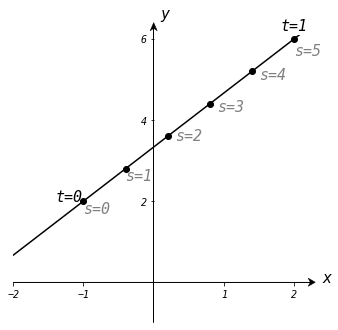

In [25]:
fig14 = plt.figure(figsize=(4,4))
ax14 = fig14.add_axes([0,0,1,1])
ax14.set_xlim(-2, 2.1)
ax14.set_ylim(-1, 6.1)
ax14.set_yticks([2, 4, 6])
ax14.set_xticks([-2, -1, 1, 2])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax14.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax14.spines[direction].set_position('zero')

ax14.arrow(-2, 0, 4.2, 0., fc='k', ec='k', lw = .5, head_width=0.2, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax14.arrow(0, -1, 0, 7.2, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.2, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 100)
ax14.plot(3*t-1, 4*t+2, color='black')

s = np.linspace(0, 5, 6)
ax14.scatter(3/5*s-1, 4/5*s+2, color='black', zorder=15)

ax14.text(-1.4, 2, 't=0', color="black", size=15)
ax14.text(1.8, 6.2, 't=1', color="black", size=15)

ax14.text(-1, 1.7, 's=0', color="grey", size=15)
ax14.text(-0.4, 2.5, 's=1', color="grey", size=15)
ax14.text(0.3, 3.5, 's=2', color="grey", size=15)
ax14.text(0.9, 4.2, 's=3', color="grey", size=15)
ax14.text(1.5, 5, 's=4', color="grey", size=15)
ax14.text(2, 5.6, 's=5', color="grey", size=15)

ax14.text(2.4, 0, 'x', color="black", size=15)
ax14.text(0.1, 6.5, 'y', color="black", size=15)
fig14.savefig("fig_vector_fun_14.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_15a

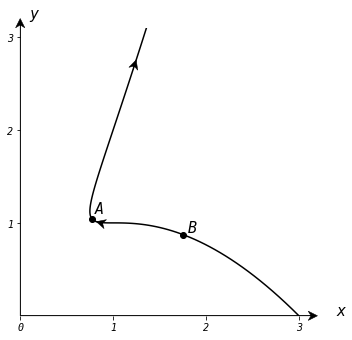

In [26]:
fig15a = plt.figure(figsize=(4,4))
ax15a = fig15a.add_axes([0,0,1,1])
ax15a.set_xlim(0, 3.1)
ax15a.set_ylim(0, 3.1)
ax15a.set_yticks([1, 2, 3])
ax15a.set_xticks([0, 1, 2, 3])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax15a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax15a.spines[direction].set_position('zero')

ax15a.arrow(0, 0, 3.1, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax15a.arrow(0, 0, 0, 3.1, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-1, 1.4, 100)
ax15a.plot(t**2-t+1, t**3+1, color='black')
ax15a.scatter([0.77, 1.75], [1.04, 0.875], color='black')

for i in range(50, 100, 40):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1+1, t1**3+1
    ax15a.arrow(x, y, (t2**2-t2+1)-x, (t2**3+1)-y, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax15a.text(0.8, 1.1, 'A', color="black", size=15)
ax15a.text(1.8, 0.9, 'B', color="black", size=15)

ax15a.text(3.4, 0, 'x', color="black", size=15)
ax15a.text(0.1, 3.2, 'y', color="black", size=15)
fig15a.savefig("fig_vector_fun_15a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_15b

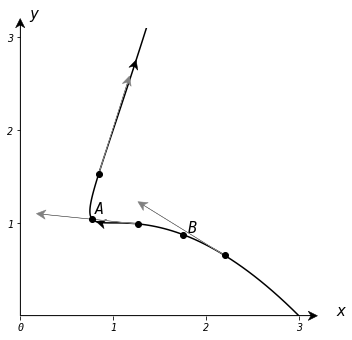

In [27]:
fig15b = plt.figure(figsize=(4,4))
ax15b = fig15b.add_axes([0,0,1,1])
ax15b.set_xlim(0, 3.1)
ax15b.set_ylim(0, 3.1)
ax15b.set_yticks([1, 2, 3])
ax15b.set_xticks([0, 1, 2, 3])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax15b.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax15b.spines[direction].set_position('zero')

ax15b.arrow(0, 0, 3.1, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax15b.arrow(0, 0, 0, 3.1, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-1, 1.4, 100)
ax15b.plot(t**2-t+1, t**3+1, color='black')
ax15b.scatter([0.77, 1.75, 0.8461, 1.2684, 2.20203], [1.04, 0.875, 1.53144, 0.989352, 0.649597], color='black', zorder=15)

for i in range(50, 100, 40):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1+1, t1**3+1
    ax15b.arrow(x, y, (t2**2-t2+1)-x, (t2**3+1)-y, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax15b.text(0.8, 1.1, 'A', color="black", size=15)
ax15b.text(1.8, 0.9, 'B', color="black", size=15)

ax15b.arrow(0.8461, 1.53144, 0.30044, 0.9538, fc='grey', ec='grey', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False, zorder=10)
ax15b.arrow(1.2684, 0.989352, -0.994955, 0.100328, fc='grey', ec='grey', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False, zorder=10)
ax15b.arrow(2.20203, 0.649597, -0.8504, 0.526143, fc='grey', ec='grey', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False, zorder=10)


ax15b.text(3.4, 0, 'x', color="black", size=15)
ax15b.text(0.1, 3.2, 'y', color="black", size=15)
fig15b.savefig("fig_vector_fun_15b.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_16

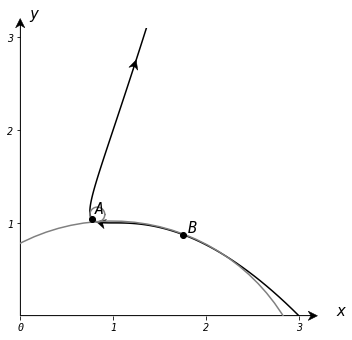

In [28]:
fig16 = plt.figure(figsize=(4,4))
ax16 = fig16.add_axes([0,0,1,1])
ax16.set_xlim(0, 3.1)
ax16.set_ylim(0, 3.1)
ax16.set_yticks([1, 2, 3])
ax16.set_xticks([0, 1, 2, 3])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax16.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax16.spines[direction].set_position('zero')

ax16.arrow(0, 0, 3.1, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax16.arrow(0, 0, 0, 3.1, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-1, 1.4, 100)
ax16.plot(t**2-t+1, t**3+1, color='black')
ax16.scatter([0.77, 1.75], [1.04, 0.875], color='black', zorder=15)

theta = np.linspace(0, 2*np.pi, 100)
ax16.plot(.08*np.cos(theta)+.83,.08*np.sin(theta)+1.09, color='grey')
ax16.plot(2.17*np.cos(theta)+.99,2.17*np.sin(theta)+-1.15, color='grey')

for i in range(50, 100, 40):
    t1 = t[i]
    t2 = t[i+1]
    x, y = t1**2-t1+1, t1**3+1
    ax16.arrow(x, y, (t2**2-t2+1)-x, (t2**3+1)-y, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= True, clip_on = False)

ax16.text(0.8, 1.1, 'A', color="black", size=15)
ax16.text(1.8, 0.9, 'B', color="black", size=15)

ax16.text(3.4, 0, 'x', color="black", size=15)
ax16.text(0.1, 3.2, 'y', color="black", size=15)
fig16.savefig("fig_vector_fun_16.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_17a

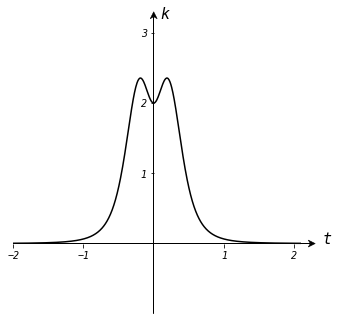

In [29]:
fig17a = plt.figure(figsize=(4,4))
ax17a = fig17a.add_axes([0,0,1,1])
ax17a.set_xlim(-2, 2.1)
ax17a.set_ylim(-1, 3.1)
ax17a.set_yticks([1, 2, 3])
ax17a.set_xticks([-2, -1, 1, 2])

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax17a.spines[direction].set_color('none')
    if direction in ["left", "bottom"]:
        ax17a.spines[direction].set_position('zero')

ax17a.arrow(-2, 0, 4.2, 0., fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)
ax17a.arrow(0, -1, 0, 4.2, fc='k', ec='k', lw = .5, head_width=0.1, head_length=0.1, overhang = 0.3, length_includes_head= False, clip_on = False)

t = np.linspace(-3, 3, 1000)
ax17a.plot(t, np.sqrt(144*t**4+144*t**2+4)/(np.sqrt(1+4*t**2+36*t**4))**3, color='black')

ax17a.text(2.4, 0, 't', color="black", size=15)
ax17a.text(0.1, 3.2, 'k', color="black", size=15)
fig17a.savefig("fig_vector_fun_17a.pdf",bbox_inches='tight')
plt.show()

### fig_vector_fun_17b

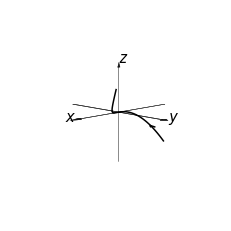

In [30]:
# figure set-up
fig17b = plt.figure(figsize=(4,4))
ax17b = plt.axes(projection='3d')
ax17b.axis('off')
ax17b.margins(0,0,0)

t = np.linspace(-2, 2, 100)
ax17b.plot3D(t, t**2, 2*t**3, 'black')

ax17b.quiver(t[10], t[10]**2, 2*t[10]**3, -t[10]+t[11], -t[10]**2+t[11]**2, -2*t[20]**3+2*t[21]**3, arrow_length_ratio=3, color='black')

# Axis
arrow3d(ax17b, length=8, width=0.1, head=0.1, headwidth=4, theta_x=90, theta_z=90, color='black', offset=(-4,0,0))
arrow3d(ax17b, length=18, width=0.07, head=0.05, headwidth=4, theta_x=-90, color='black', offset=(0,-9,0))
arrow3d(ax17b, length=54, width=0.01, head=0.05, headwidth=10, color='black', offset=(0,0,-27))

ax17b.text(4.2, -0.2, 0, "x", style='italic', color='black', size=15)
ax17b.text(0, 9, 0, "y", style='italic', color='black', size=15)
ax17b.text(0, 0, 27, "z", style='italic', color='black', size=15)

ax17b.view_init(10, 45)
fig17b.savefig("fig_vector_fun_17b.pdf",bbox_inches='tight',dpi=200)
plt.show()